CLASIFICACION DE VIDEOS DE SEÑALES DE TRAFICO

In [1]:
! pip install kagglehub
! pip install opencv-python


In [2]:
import kagglehub
import os   
import pandas as pd



In [3]:


# 1. DESCARGA (Usando solo el handle, sin la URL de kaggle.com)
handle = "aryashah2k/highway-traffic-videos-dataset"
path = kagglehub.dataset_download(handle)
print(f"Ruta del dataset: {path}")

# 2. LOCALIZAR EL ARCHIVO .TXT
# Según tu imagen, el archivo se llama 'info.txt'
archivo_info = None

for root, dirs, files in os.walk(path):
    for file in files:
        if file == "info.txt":
            archivo_info = os.path.join(root, file)
            break

# 3. CARGAR LOS DATOS
if archivo_info:
    print(f"Archivo encontrado: {archivo_info}")
    
    # El archivo info.txt usa espacios como separador según se ve en la imagen
    # Las columnas parecen ser: video_name, date, time, direction, day/night, weather, class_id, label
    columnas = ["video", "fecha", "id_temp", "direccion", "periodo", "clima", "id_clase", "trafico"]
    
    df = pd.read_csv(archivo_info, sep=r'\s+', names=columnas, header=None)
    
    print("\nPrimeras filas del dataset de tráfico:")
    print(df.head())
else:
    print("Error: No se encontró el archivo 'info.txt' en la descarga.")

100%|██████████| 60.5M/60.5M [00:04<00:00, 15.4MB/s]

Extracting files...


Ruta del dataset: /root/.cache/kagglehub/datasets/aryashah2k/highway-traffic-videos-dataset/versions/1
Archivo encontrado: /root/.cache/kagglehub/datasets/aryashah2k/highway-traffic-videos-dataset/versions/1/info.txt

Primeras filas del dataset de tráfico:
                                                                                        video  \
#                        filename, date(yyyymmdd), timestamp, direction, day/night,  weather,   
cctv052x2004080516x01638 20040805  16.01638        south      day        overcast           2   
cctv052x2004080516x01639 20040805  16.01639        south      day        overcast           2   
cctv052x2004080516x01640 20040805  16.01640        south      day        overcast           2   
cctv052x2004080516x01641 20040805  16.01641        south      day        overcast           2   

                                                                                     fecha  \
#                        filename, date(yyyymmdd), timestamp, dire

In [4]:


df.head()



,,,,,,video,fecha,id_temp,direccion,periodo,clima,id_clase,trafico
#,"filename,","date(yyyymmdd),","timestamp,","direction,","day/night,","weather,",start,"frame,",number,of,"frames,","class,",notes
cctv052x2004080516x01638,20040805,16.01638,south,day,overcast,2,53,medium,NaN,NaN,NaN,NaN,NaN
cctv052x2004080516x01639,20040805,16.01639,south,day,overcast,2,53,medium,NaN,NaN,NaN,NaN,NaN
cctv052x2004080516x01640,20040805,16.01640,south,day,overcast,2,48,light,NaN,NaN,NaN,NaN,NaN
cctv052x2004080516x01641,20040805,16.01641,south,day,overcast,2,52,medium,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(255, 8)

In [6]:
import pandas as pd

# 1. Definimos los 9 nombres de columna que quieres
nuevos_nombres = [
    "filename", "date", "timestamp", "direction", 
    "day/night", "weather", "start frame", "number of frames", "traffic label"
]

# 2. Leemos el archivo ignorando el exceso de columnas
df = pd.read_csv(
    archivo_info, 
    sep=r'\s+', 
    skiprows=21, 
    names=nuevos_nombres, 
    header=None,
    engine='python',
    usecols=range(9),  # <--- ESTO ARREGLA EL ERROR: Solo lee las primeras 9 columnas
    on_bad_lines='warn' # Si hay una línea muy mal, te avisa pero no detiene el código
)

# 3. Eliminamos las últimas 5 filas como pediste
df = df.iloc[:-5]

# 4. Limpieza: quitar filas donde el nombre del archivo esté vacío
df = df.dropna(subset=['filename'])

# Resultado final
print("¡Tabla alineada y limpia!")
display(df.head(10))

¡Tabla alineada y limpia!


,filename,date,timestamp,direction,day/night,weather,start frame,number of frames,traffic label
0,cctv052x2004080517x01659,20040805,17.01659,south,day,overcast,2,53,heavy
1,cctv052x2004080517x01660,20040805,17.01660,south,day,overcast,2,53,heavy
2,cctv052x2004080517x01661,20040805,17.01661,south,day,clear,2,53,heavy
3,cctv052x2004080517x01662,20040805,17.01662,south,day,clear,2,53,heavy
4,cctv052x2004080517x01663,20040805,17.01663,south,day,overcast,2,53,heavy
5,cctv052x2004080517x01664,20040805,17.01664,south,day,overcast,2,52,medium
6,cctv052x2004080517x01665,20040805,17.01665,south,day,overcast,2,53,medium
7,cctv052x2004080518x01666,20040805,18.01666,south,day,overcast,2,51,medium
8,cctv052x2004080518x01667,20040805,18.01667,south,day,overcast,2,51,medium
9,cctv052x2004080518x01668,20040805,18.01668,south,day,overcast,2,53,heavy


In [9]:
import cv2
import os
import pandas as pd # Asegúrate de tener pandas importado

# --- 1. CONFIGURACIÓN ---
ruta_videos_origen = "/root/.cache/kagglehub/datasets/aryashah2k/highway-traffic-videos-dataset/versions/1/video/"
ruta_salida_base = "dataset_frames"

# --- 2. VERIFICACIÓN DEL DATAFRAME (Diagnóstico) ---
# Imprimimos las columnas para asegurarnos de que estamos leyendo la correcta
print("Columnas encontradas en tu Excel/CSV:", df.columns.tolist())
print("-" * 30)

# --- 3. FUNCIÓN DE EXTRACCIÓN ---
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    if not video_reader.isOpened():
        return []
    
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    if video_frames_count == 0:
        video_reader.release()
        return []

    skip_frames_window = max(int(video_frames_count / 15), 1)
    for frame_counter in range(15):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()
        if not success:
            break
        frames_list.append(frame)
    video_reader.release()
    return frames_list

# --- 4. BUCLE PRINCIPAL CON CORRECCIONES ---
print(f"Iniciando proceso. Salida en: {os.path.abspath(ruta_salida_base)}")

count_videos = 0
errores = 0

for index, row in df.iterrows():
    # A. LIMPIEZA DE DATOS
    nombre_archivo = str(row['filename']).strip() # Quitamos espacios extra
    
    # IMPORTANTE: Cambia 'target' por el nombre real de tu columna ('class', 'label', etc)
    # Usamos .strip() y .lower() para evitar carpetas como "Light " o "LIGHT"
    try:
        clase_trafico = str(row['traffic label']).strip().lower() 
    except KeyError:
        print("ERROR: No existe la columna 'target' en tu DataFrame. Revisa el nombre.")
        break

    # B. GESTIÓN DE EXTENSIÓN .AVI
    if not nombre_archivo.endswith('.avi'):
        nombre_completo = f"{nombre_archivo}.avi"
    else:
        nombre_completo = nombre_archivo
        
    ruta_video_input = os.path.join(ruta_videos_origen, nombre_completo)
    
    # C. VERIFICACIÓN Y PROCESAMIENTO
    if os.path.exists(ruta_video_input):
        frames = frames_extraction(ruta_video_input)
        
        if frames:
            # Crear carpeta de categoría (ej: dataset_frames/heavy)
            carpeta_destino = os.path.join(ruta_salida_base, clase_trafico)
            os.makedirs(carpeta_destino, exist_ok=True)
            
            nombre_sin_ext = nombre_completo.replace('.avi', '')

            for i, frame in enumerate(frames):
                nombre_imagen = f"{nombre_sin_ext}_frame_{i}.jpg"
                ruta_final = os.path.join(carpeta_destino, nombre_imagen)
                
                # Guardar
                cv2.imwrite(ruta_final, frame)

            count_videos += 1
            # Feedback visual cada 10 videos
            if count_videos % 10 == 0:
                print(f"✅ Procesado video: {nombre_completo} -> Clase: {clase_trafico}")
        else:
            print(f"⚠️ Video vacío o corrupto: {nombre_completo}")
    else:
        # Aquí está el problema habitual: la ruta no coincide
        errores += 1
        if errores < 5: # Solo mostramos los primeros 5 errores para no saturar
            print(f"❌ NO ENCONTRADO: {ruta_video_input}")
            print(f"   (Comprueba que la ruta origen sea correcta)")

print("-" * 30)
print(f"Resumen: {count_videos} videos procesados correctamente.")
if errores > 0:
    print(f"Hubo {errores} videos que no se encontraron (revisar rutas).")

Columnas encontradas en tu Excel/CSV: ['filename', 'date', 'timestamp', 'direction', 'day/night', 'weather', 'start frame', 'number of frames', 'traffic label']
------------------------------
Iniciando proceso. Salida en: /content/dataset_frames
✅ Procesado video: cctv052x2004080518x01668.avi -> Clase: heavy
✅ Procesado video: cctv052x2004080519x01678.avi -> Clase: light
✅ Procesado video: cctv052x2004080519x01688.avi -> Clase: light
✅ Procesado video: cctv052x2004080520x01699.avi -> Clase: light
✅ Procesado video: cctv052x2004080606x01829.avi -> Clase: light
✅ Procesado video: cctv052x2004080607x01839.avi -> Clase: light
✅ Procesado video: cctv052x2004080608x01849.avi -> Clase: light
✅ Procesado video: cctv052x2004080609x01859.avi -> Clase: light
✅ Procesado video: cctv052x2004080609x01870.avi -> Clase: light
✅ Procesado video: cctv052x2004080610x01880.avi -> Clase: light
✅ Procesado video: cctv052x2004080610x01891.avi -> Clase: light
✅ Procesado video: cctv052x2004080611x01902.avi ->

# TRAIN Y VAL


Indexando dataset...
Train: 183 | Val: 46
Entrenando con MobileNetV2, L2 Regularization y LR=0.0001...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.2876 - loss: 1.7443 - val_accuracy: 0.8250 - val_loss: 0.9489
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.4019 - loss: 1.3396 - val_accuracy: 0.8500 - val_loss: 0.8641
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.4903 - loss: 1.3218 - val_accuracy: 0.8500 - val_loss: 0.7733
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.5020 - loss: 1.2810 - val_accuracy: 0.8750 - val_loss: 0.6930
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.6047 - loss: 1.0386 - val_accuracy: 0.8500 - val_loss: 0.6176
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.7168 - loss: 0.7909 - val_accuracy: 0.8500 - val_loss: 0.5836
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.7324 - loss: 0.7775 - val_accuracy: 0.9000 - val_loss: 0.5109
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.6835 - loss: 0.8527 - val_accuracy: 0.90

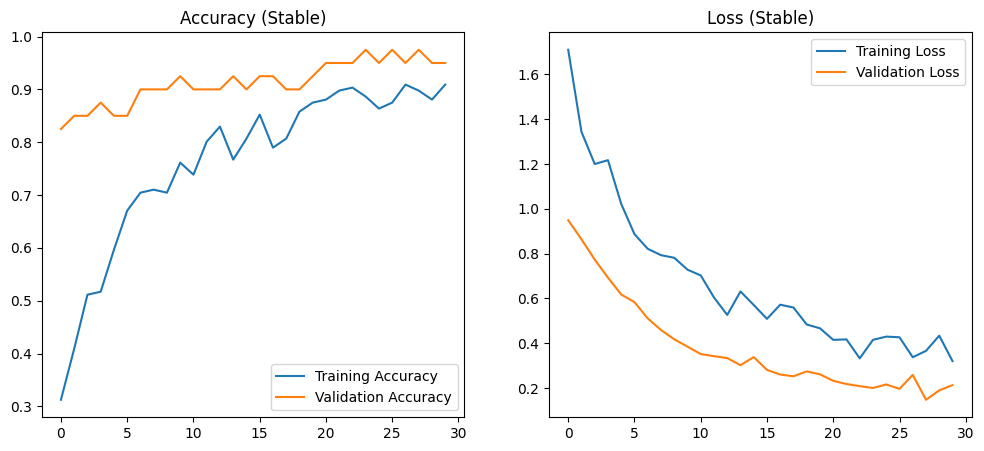

5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step

--- Classification Report Final ---
              precision    recall  f1-score   support

       light       1.00      1.00      1.00        26
      medium       1.00      0.67      0.80         6
       heavy       0.80      1.00      0.89         8

    accuracy                           0.95        40
   macro avg       0.93      0.89      0.90        40
weighted avg       0.96      0.95      0.95        40



In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow.keras.applications import MobileNetV2  # CAMBIO: Más ligera
from tensorflow.keras.layers import TimeDistributed, GlobalAveragePooling2D, LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# --- CONFIGURACIÓN AJUSTADA ---
IMG_SIZE = 128
# Subimos Batch Size para reducir el ruido. MobileNet lo permite.
BATCH_SIZE = 8  
NUM_FRAMES = 15
CLASES = ['light', 'medium', 'heavy']
MAPA_CLASES = {cls: i for i, cls in enumerate(CLASES)}
RUTA_DATASET = "dataset_frames" 

# --- 1. FUNCIÓN DE LISTADO (Igual) ---
def obtener_listado_videos(base_dir):
    samples = []
    print("Indexando dataset...")
    for label in CLASES:
        path_clase = os.path.join(base_dir, label)
        if not os.path.exists(path_clase): continue
        todos_archivos = glob(os.path.join(path_clase, "*.jpg"))
        videos_unicos = set()
        for f in todos_archivos:
            nombre_archivo = os.path.basename(f)
            partes = nombre_archivo.split('_frame_')
            if len(partes) > 0:
                nombre_base = partes[0]
                videos_unicos.add((label, nombre_base))
        for vid in videos_unicos:
            samples.append({'label': vid[0], 'video_name': vid[1], 'dir_path': path_clase})
    return samples

# --- 2. GENERADOR (Igual) ---
class TrafficDataGenerator(Sequence):
    def __init__(self, samples, batch_size=8, img_size=128, frames_per_video=15, shuffle=True):
        self.samples = samples
        self.batch_size = batch_size
        self.img_size = img_size
        self.frames_per_video = frames_per_video
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.samples) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_ids_temp = [self.samples[k] for k in indexes]
        X, y = self.__data_generation(list_ids_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.samples))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_ids_temp):
        X = np.zeros((self.batch_size, self.frames_per_video, self.img_size, self.img_size, 3), dtype='float32')
        y = np.zeros((self.batch_size), dtype=int)
        for i, sample in enumerate(list_ids_temp):
            for f_idx in range(self.frames_per_video):
                fname = f"{sample['video_name']}_frame_{f_idx}.jpg"
                path = os.path.join(sample['dir_path'], fname)
                if os.path.exists(path):
                    img = cv2.imread(path)
                    img = cv2.resize(img, (self.img_size, self.img_size))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = img / 255.0 # MobileNetV2 funciona bien con 0-1 o -1 a 1.
                    X[i, f_idx] = img
            y[i] = MAPA_CLASES[sample['label']]
        return X, to_categorical(y, num_classes=3)

# --- 3. MODELO ESTABILIZADO ---
def build_stable_model():
    # Usamos MobileNetV2: Menos memoria -> Mayor Batch Size -> Gradiente más estable
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False

    model = Sequential([
        Input(shape=(NUM_FRAMES, IMG_SIZE, IMG_SIZE, 3)),
        TimeDistributed(base_model),
        TimeDistributed(GlobalAveragePooling2D()),
        
        # Dropout suave antes de la LSTM para variar la entrada
        TimeDistributed(Dropout(0.3)),
        
        # LSTM con regularización interna para evitar saltos bruscos
        LSTM(32, return_sequences=False, recurrent_dropout=0.0),
        
        # Capa densa con regularización L2 (Peso del castigo: 0.001)
        Dense(64, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    
    # Learning Rate reducido manualmente para evitar oscilaciones (0.0001)
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- 4. EJECUCIÓN ---

# A) Datos
todos_los_videos = obtener_listado_videos(RUTA_DATASET)
train_samples, val_samples = train_test_split(todos_los_videos, test_size=0.2, random_state=42, shuffle=True)

print(f"Train: {len(train_samples)} | Val: {len(val_samples)}")

# B) Generadores con Batch Size 8
train_generator = TrafficDataGenerator(train_samples, batch_size=BATCH_SIZE, img_size=IMG_SIZE, shuffle=True)
val_generator = TrafficDataGenerator(val_samples, batch_size=BATCH_SIZE, img_size=IMG_SIZE, shuffle=False)

# C) Entrenar Modelo Estabilizado
model = build_stable_model()
print("Entrenando con MobileNetV2, L2 Regularization y LR=0.0001...")

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30 # Más épocas porque el aprendizaje es más lento (LR bajo)
)

# --- 5. VISUALIZACIÓN ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy (Stable)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss (Stable)')
plt.legend()
plt.show()

# Reporte Final
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = []
for i in range(len(val_generator)):
    _, batch_y = val_generator[i]
    y_true.extend(np.argmax(batch_y, axis=1))
y_pred = y_pred[:len(y_true)]

print("\n--- Classification Report Final ---")
print(classification_report(y_true, y_pred, target_names=CLASES))

----------------------------------------------------

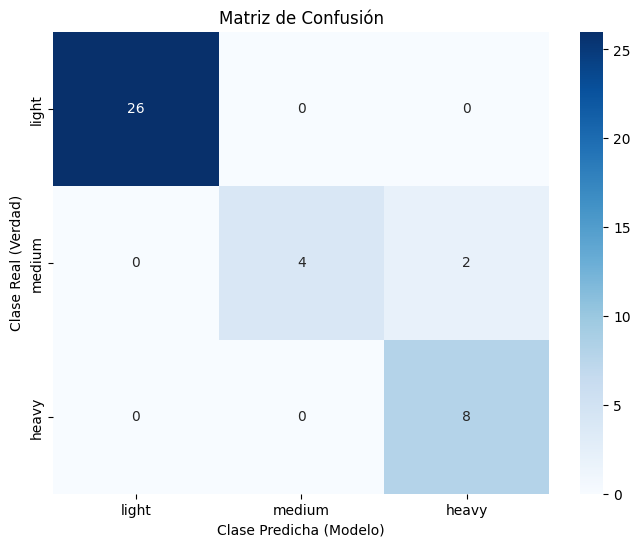

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz
cm = confusion_matrix(y_true, y_pred)

# Pintar la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True,         # Poner los números en las celdas
            fmt='d',            # Formato entero (sin decimales)
            cmap='Blues',       # Mapa de color azul
            xticklabels=CLASES, # Etiquetas eje X
            yticklabels=CLASES) # Etiquetas eje Y

plt.ylabel('Clase Real (Verdad)')
plt.xlabel('Clase Predicha (Modelo)')
plt.title('Matriz de Confusión')
plt.show()